In [2]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn import metrics 
from sklearn.ensemble import RandomForestRegressor

In [3]:
Gold_Data = pd.read_csv("GoldPriceData.csv")

In [4]:
Gold_Data.head()

,Date,SPX,GLD,USO,SLV,EUR/USD
0,1/2/2008,1447.160034,84.860001,78.470001,15.180,1.471692
1,1/3/2008,1447.160034,85.570000,78.370003,15.285,1.474491
2,1/4/2008,1411.630005,85.129997,77.309998,15.167,1.475492
3,1/7/2008,1416.180054,84.769997,75.500000,15.053,1.468299
4,1/8/2008,1390.189941,86.779999,76.059998,15.590,1.557099


In [9]:
# --> print the last 5 rows of the dataframe 
Gold_Data.tail()

,Date,SPX,GLD,USO,SLV,EUR/USD
2285,5/8/2018,2671.919922,124.589996,14.0600,15.5100,1.186789
2286,5/9/2018,2697.790039,124.330002,14.3700,15.5300,1.184722
2287,5/10/2018,2723.070068,125.180000,14.4100,15.7400,1.191753
2288,5/14/2018,2730.129883,124.489998,14.3800,15.5600,1.193118
2289,5/16/2018,2725.780029,122.543800,14.4058,15.4542,1.182033


In [5]:
Gold_Data.describe()

,SPX,GLD,USO,SLV,EUR/USD
count,2290.000000,2290.000000,2290.000000,2290.000000,2290.000000
mean,1654.315776,122.732875,31.842221,20.084997,1.283653
std,519.111540,23.283346,19.523517,7.092566,0.131547
min,676.530029,70.000000,7.960000,8.850000,1.039047
25%,1239.874969,109.725000,14.380000,15.570000,1.171313
50%,1551.434998,120.580002,33.869999,17.268500,1.303297
75%,2073.010070,132.840004,37.827501,22.882500,1.369971
max,2872.870117,184.589996,117.480003,47.259998,1.598798


In [6]:
Gold_Data.shape

(2290, 6)

In [12]:
# -> Getting some more basic information
Gold_Data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2290 entries, 0 to 2289
Data columns (total 6 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     2290 non-null   object 
 1   SPX      2290 non-null   float64
 2   GLD      2290 non-null   float64
 3   USO      2290 non-null   float64
 4   SLV      2290 non-null   float64
 5   EUR/USD  2290 non-null   float64
dtypes: float64(5), object(1)
memory usage: 107.5+ KB


In [16]:
Gold_Data.isnull().sum()

SPX        0
GLD        0
USO        0
SLV        0
EUR/USD    0
dtype: int64

In [15]:
Gold_Data = Gold_Data.drop('Date',axis=1)

In [17]:
correlation = Gold_Data.corr()

<Axes: >

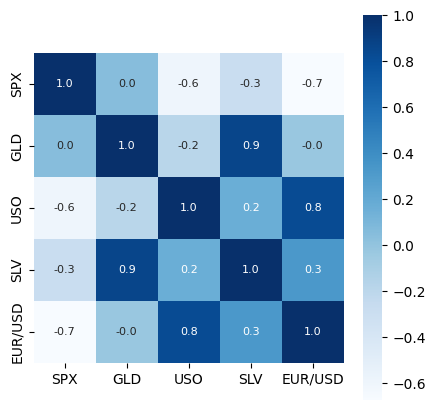

In [27]:
plt.figure(figsize=(5,5))
sns.heatmap(correlation, cbar = True , square = True ,fmt='.1f' , annot = True ,annot_kws={'size': 8}, cmap= 'Blues')

In [21]:
print(correlation['GLD'])

SPX        0.049345
GLD        1.000000
USO       -0.186360
SLV        0.866632
EUR/USD   -0.024375
Name: GLD, dtype: float64


<Figure size 500x500 with 0 Axes>

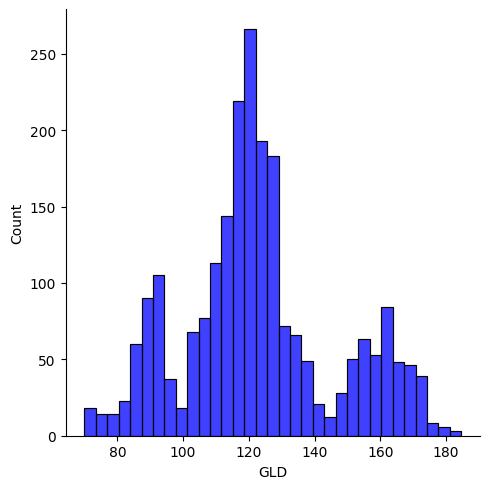

In [25]:
# -> Checking the distribution of the GLD Price
plt.figure(figsize=(5,5))
sns.displot(Gold_Data['GLD'] , color ='Blue')

In [29]:
x = Gold_Data.drop("GLD" , axis = 1)
y = Gold_Data["GLD"]

In [30]:
print(x)
print(y)

              SPX        USO      SLV   EUR/USD
0     1447.160034  78.470001  15.1800  1.471692
1     1447.160034  78.370003  15.2850  1.474491
2     1411.630005  77.309998  15.1670  1.475492
3     1416.180054  75.500000  15.0530  1.468299
4     1390.189941  76.059998  15.5900  1.557099
...           ...        ...      ...       ...
2285  2671.919922  14.060000  15.5100  1.186789
2286  2697.790039  14.370000  15.5300  1.184722
2287  2723.070068  14.410000  15.7400  1.191753
2288  2730.129883  14.380000  15.5600  1.193118
2289  2725.780029  14.405800  15.4542  1.182033

[2290 rows x 4 columns]
0        84.860001
1        85.570000
2        85.129997
3        84.769997
4        86.779999
           ...    
2285    124.589996
2286    124.330002
2287    125.180000
2288    124.489998
2289    122.543800
Name: GLD, Length: 2290, dtype: float64


In [31]:
x_train , x_test , y_train , y_test = train_test_split(x , y , test_size=0.2 ,  random_state = 2) 

In [32]:
print(x.shape , x_train.shape , x_test.shape)

(2290, 4) (1832, 4) (458, 4)


**Model Training**

In [33]:
regressor = RandomForestRegressor(n_estimators=100)

In [34]:
regressor.fit(x_train , y_train)

RandomForestRegressor()

**Model Evaluation**

In [36]:
x_test_prediction = regressor.predict(x_test)

In [38]:
print(x_test_prediction)

[168.42989932  82.35299992 116.1482001  127.52900096 120.74050124
 154.86989773 149.7345988  126.08450012 117.49299891 126.13510051
 116.85080085 171.64170089 141.47539916 167.79779856 115.12890027
 117.64820089 138.11110306 170.16120105 159.800003   160.79379903
 154.95200055 125.29140037 176.49629938 156.92710346 125.14020032
  93.8311997   77.59030059 120.46720022 119.0795989  167.48099947
  88.02720072 125.14719995  91.0604009  117.6135005  121.17029892
 136.59000082 115.47960131 115.24140058 146.73499926 106.88350076
 104.2158025   87.03929788 126.61850038 118.02160027 154.45939869
 119.65539964 108.35459997 107.94709882  93.19100054 127.18239778
  75.42700002 113.57629898 121.25500016 111.23159905 118.81939897
 120.47959953 158.97119976 168.38550077 146.70839673  85.94419884
  94.42310029  86.77419906  90.5700002  119.04230052 126.46550038
 127.51650015 170.21390039 122.19589918 117.25099884  98.44840012
 168.21590064 142.81609824 131.95710258 121.18020199 121.40429945
 119.63990

In [40]:
# -> R Squared Error
error_score = metrics.r2_score(y_test ,x_test_prediction )
print("R Squared Error ", error_score)

R Squared Error  0.9893647310833762


**Compare the Actual values and the predicted values in a plot**

In [41]:
y_test = list(y_test)

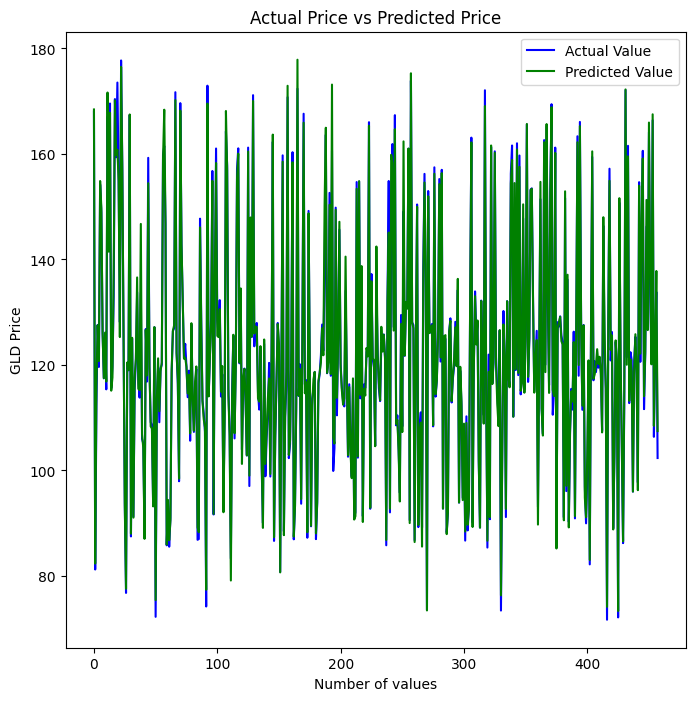

In [45]:
plt.figure(figsize=(8,8))
plt.plot(y_test, color='blue', label = 'Actual Value')
plt.plot(x_test_prediction, color='green', label='Predicted Value')
plt.title('Actual Price vs Predicted Price')
plt.xlabel('Number of values')
plt.ylabel('GLD Price')
plt.legend()
plt.show()